<a href="https://colab.research.google.com/github/m-arun99/Prediction_of_laptop_prices/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
df = pd.read_csv("/content/diabetes.csv")

In [32]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [33]:
df.shape

(768, 9)

In [34]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

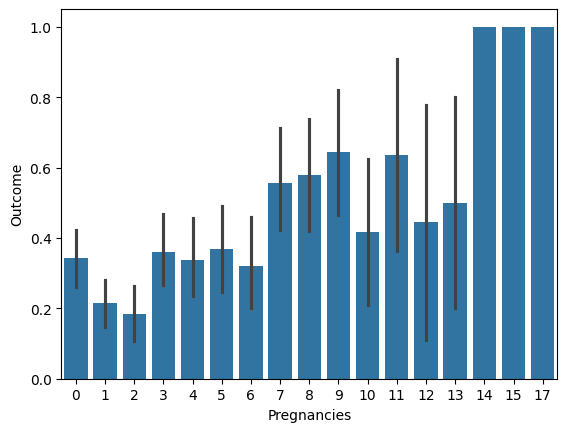

In [35]:
sns.barplot(x=df["Pregnancies"],y=df["Outcome"])

plt.show()


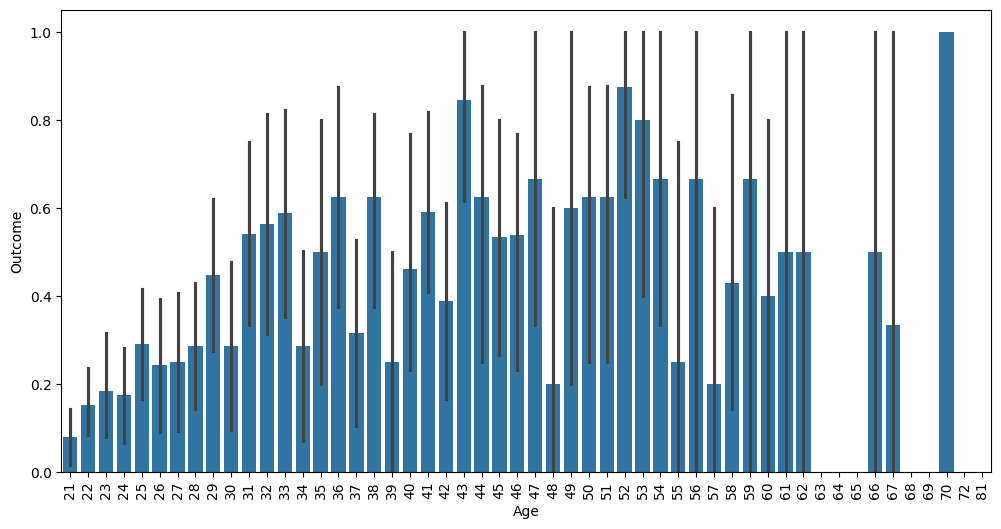

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Age"],y=df["Outcome"])
plt.xticks(rotation=90)
plt.show()

In [37]:
df1=df.copy()
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
value=ss.fit_transform(df)

In [38]:
new_df=pd.DataFrame(value,columns=df.columns)
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

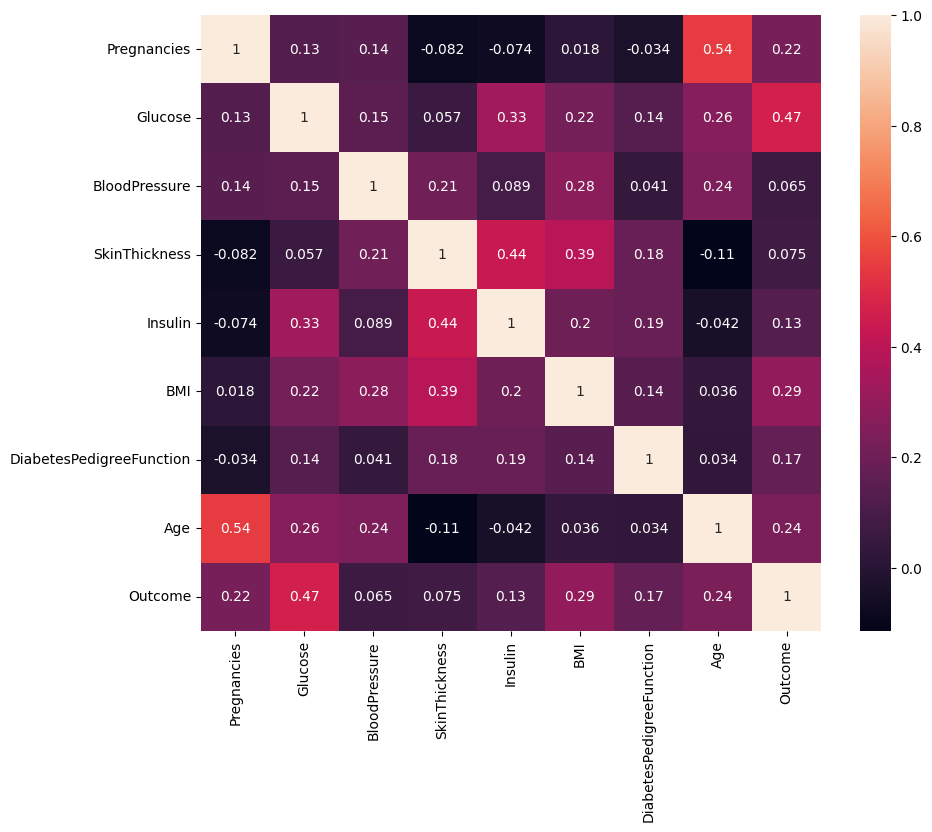

In [39]:
correlation = df.corr()
print(correlation)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True)


In [40]:
X=new_df.drop(columns=["Outcome"])
y=new_df['Outcome']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)


In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
ycap=lr.predict(x_test)

In [45]:
print(ycap)

[ 1.42302485e+00 -2.86220185e-01 -5.14319369e-01  5.34944581e-01
 -3.75405624e-01 -8.46609541e-01  6.85431657e-01  9.32150733e-01
  1.52531063e-01  9.91683841e-02  4.15517198e-01  1.42699410e+00
  6.97175612e-03 -2.42214691e-01 -4.02139026e-01 -2.74187039e-01
  9.75114115e-01 -9.59153457e-01  2.17143160e-01 -8.42691453e-02
  5.33228312e-01  1.56882718e-01 -1.17735516e-01 -6.67883859e-01
 -7.23059915e-01  9.48953489e-02 -7.49481493e-01  1.10857143e+00
 -4.14976012e-01 -3.16472764e-01  2.75599625e-01 -1.12821523e-01
 -5.04679687e-01  2.39857138e-01 -4.45074027e-01  6.49542301e-01
  2.54016161e-01 -5.32597029e-01  6.12877705e-02  6.96043355e-01
 -3.40074433e-02 -1.89410437e-01 -2.71582989e-01  8.76725354e-01
  7.11757054e-01 -1.30784758e+00 -5.24929168e-01 -1.63818963e-01
  8.48368986e-02  3.06389428e-03  1.89644033e-01 -2.12197579e-01
  9.84391766e-01  2.98196713e-01 -3.78532507e-01 -1.80570245e+00
 -6.57160156e-01  3.18751089e-01 -2.54208775e-02 -4.89720095e-01
  6.35073017e-01  2.53774

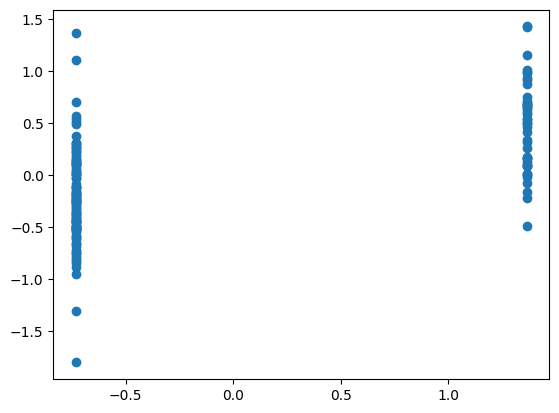

In [54]:
plt.scatter(y_test,ycap)

In [46]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,ycap)
print(mse)

0.6325487746498585


In [47]:
print(np.sqrt(mse))

0.7953293497978422


In [48]:
r2=metrics.r2_score(y_test,ycap)

print("R2 SCORE:", r2)

R2 SCORE: 0.32230203252064216
